# Transfer Learning - Comparing losses and accuracies for different standard algorithms, Confusion Matrix and Classification Report. 

Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data/Train'
val = 'c:/Users/jadha/Data/MTP_data/Test'

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

Number of Training samples   :  970
Number of Validation samples :  147


# Image Generator: 
Real time data augmentation, the data will be  looped over (in batches)

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

defining hyperparameters, image resolution and other stuffs...

In [5]:
batch_size = 32
learning_rate = 0.001
epoch = 60

# Defining image width and height respectively
img_rows = 224
img_cols = 224

In [6]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 970 images belonging to 9 classes.
Found 147 images belonging to 9 classes.


class_mode = 'binary' (2 output classes) ---- if more class prefer class_mode = 'categorical'.

Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch

# ResNet50

In [7]:
steps_per_epoch = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch)

Steps per epoch:  30


In [11]:
from keras.applications import ResNet50
# The sequential API allows you to create models layer-by-layer
resnet_model = Sequential()
resnet_model.add(ResNet50(include_top=False, 
                   pooling='max', 
                   weights='imagenet'))
resnet_model.add(Dense(9, activation="softmax"))

# Summary: to find the number of parameters
resnet_model.layers[0].trainable=False
resnet_model.summary()

# sgd = optimizers.SGD(lr=learning_rate, decay=0.00001,momentum = 0.0,nesterov=False)
resnet_model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


warnings.filterwarnings('ignore')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 9)                 18441     
                                                                 
Total params: 23,606,153
Trainable params: 18,441
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
# Trains the model for a given number of epochs (iterations on a dataset).
resnet_training = resnet_model.fit_generator(train_generator,
                               steps_per_epoch = steps_per_epoch,
                               epochs = epoch,
                               validation_data = validation_generator,
                               validation_steps = num_of_validation_samples // batch_size)

Epoch 1/60
30/30 [==============================] - 323s 11s/step - loss: 2.1810 - accuracy: 0.1930 - val_loss: 2.0054 - val_accuracy: 0.3984
Epoch 2/60
30/30 [==============================] - 270s 9s/step - loss: 2.0170 - accuracy: 0.2857 - val_loss: 2.0744 - val_accuracy: 0.2578
Epoch 3/60
30/30 [==============================] - 252s 8s/step - loss: 1.9602 - accuracy: 0.3028 - val_loss: 1.8198 - val_accuracy: 0.4688
Epoch 4/60
30/30 [==============================] - 252s 8s/step - loss: 1.9251 - accuracy: 0.3209 - val_loss: 1.8124 - val_accuracy: 0.3672
Epoch 5/60
30/30 [==============================] - 252s 8s/step - loss: 1.8787 - accuracy: 0.3198 - val_loss: 1.6296 - val_accuracy: 0.5156
Epoch 6/60
30/30 [==============================] - 252s 8s/step - loss: 1.8982 - accuracy: 0.3038 - val_loss: 1.8360 - val_accuracy: 0.4219
Epoch 7/60
30/30 [==============================] - 259s 9s/step - loss: 1.8547 - accuracy: 0.3417 - val_loss: 1.8105 - val_accuracy: 0.4375
Epoch 8/60
3

30/30 [==============================] - 248s 8s/step - loss: 1.4251 - accuracy: 0.5075 - val_loss: 1.3845 - val_accuracy: 0.5078
Epoch 59/60
30/30 [==============================] - 245s 8s/step - loss: 1.4076 - accuracy: 0.5043 - val_loss: 1.1800 - val_accuracy: 0.5312
Epoch 60/60
30/30 [==============================] - 244s 8s/step - loss: 1.4217 - accuracy: 0.4947 - val_loss: 1.2446 - val_accuracy: 0.5000


In [52]:
    resnet_training.history

{'loss': [2.1810271739959717,
  2.016956090927124,
  1.9601620435714722,
  1.925065040588379,
  1.8786826133728027,
  1.8982361555099487,
  1.8547338247299194,
  1.8414658308029175,
  1.7827036380767822,
  1.7716339826583862,
  1.7600815296173096,
  1.7207225561141968,
  1.7313320636749268,
  1.7137186527252197,
  1.7040901184082031,
  1.6888439655303955,
  1.697390079498291,
  1.6479326486587524,
  1.6361570358276367,
  1.6512340307235718,
  1.6350290775299072,
  1.650214672088623,
  1.6463582515716553,
  1.657609462738037,
  1.5737024545669556,
  1.6489821672439575,
  1.5802240371704102,
  1.6426208019256592,
  1.574350357055664,
  1.6312987804412842,
  1.5355689525604248,
  1.547455906867981,
  1.5650495290756226,
  1.5589205026626587,
  1.5677061080932617,
  1.5600249767303467,
  1.5126056671142578,
  1.5180697441101074,
  1.560953140258789,
  1.5871472358703613,
  1.4671326875686646,
  1.5239133834838867,
  1.517371416091919,
  1.5165971517562866,
  1.5585896968841553,
  1.4967834

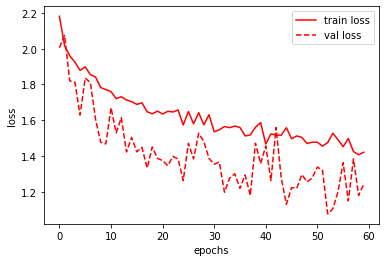

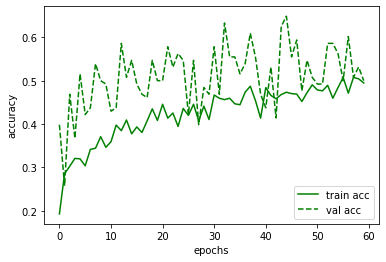

In [13]:
import matplotlib.pyplot as plt
plt.plot(resnet_training.history['loss'], label='train loss',color='r')
plt.plot(resnet_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(resnet_training.history['accuracy'], label='train acc',color='g')
plt.plot(resnet_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# plt.savefig('AccVal_acc')

# Saving the model history for ResNet - 50

In [14]:
training_accuracy_resnet      = resnet_training.history['accuracy'][-1]
training_loss_resnet          = resnet_training.history['loss'][-1]
validation_accuracy_resnet    = resnet_training.history['val_accuracy'][-1]
validation_loss_resnet        = resnet_training.history['val_loss'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)

Training Accuracy ResNet   : 0.49466949701309204
Training Loss ResNet       : 1.421743631362915
Validation Accuracy ResNet : 0.5
Validation Loss ResNet     : 1.244617223739624


# Generating Confusion Matrix and Classification Report for ResNet 50

In [15]:
# Generating Confusion Matrix and Classification Report
Y_pred_res = resnet_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(validation_generator.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_res = classification_report(validation_generator.classes, y_pred_res, target_names=target_names)
print(class_rep_res)


Confusion Matrix
[[20  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  1  0  0  0]
 [ 6  0  0  1  0  0  0  0  0]
 [ 1  0  0  5  6  1  0  7  0]
 [ 1  0  0  0 27  1  0  1  0]
 [17  0  0  0  0  2  0  1  0]
 [ 3  0  0  0  0  4  3  0  0]
 [ 6  0  0  0  0  0  0 14  0]
 [ 0  0  0  3  0  1  0  6  0]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.32      1.00      0.48        20
 Comman_Carp       0.00      0.00      0.00        10
  Grass_Carp       0.00      0.00      0.00         7
      Mrigal       0.56      0.25      0.34        20
     Pomfret       0.82      0.90      0.86        30
        Rohu       0.20      0.10      0.13        20
 Silver_carp       1.00      0.30      0.46        10
     Tilapia       0.48      0.70      0.57        20
        Tuna       0.00      0.00      0.00        10

    accuracy                           0.48       147
   macro avg       0.37      0.36      0.32       147
weighted avg       0.45      0.48      0

# Inception

In [16]:
epoch_inc = 60
learning_rate_inc = 0.001
batch_size_inc = 32

In [17]:
steps_per_epoch_inc = num_of_train_samples // batch_size_inc
print("Steps per epoch: ",steps_per_epoch_inc)

Steps per epoch:  30


In [18]:
from keras.applications import InceptionV3
# The sequential API allows us to create model layer by layer
inc_model = Sequential()
inc_model.add(InceptionV3(include_top=False, 
                      pooling='max',
                      weights='imagenet'))
inc_model.add(Dense(9, activation="softmax"))

# Summary: to find the number of parameters
inc_model.layers[0].trainable=False
inc_model.summary()

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
inc_model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_3 (Dense)             (None, 9)                 18441     
                                                                 
Total params: 21,821,225
Trainable params: 18,441
Non-trainable params: 21,802,784
_________________________________________________________________


In [19]:
# Trains the model for a given number of epochs (iterations on a dataset).
inc_training = inc_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_inc,
                                       epochs = epoch_inc,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_inc)

Epoch 1/60
30/30 [==============================] - 233s 8s/step - loss: 2.7650 - accuracy: 0.3689 - val_loss: 1.9662 - val_accuracy: 0.4375
Epoch 2/60
30/30 [==============================] - 219s 7s/step - loss: 1.0059 - accuracy: 0.6578 - val_loss: 1.0221 - val_accuracy: 0.7031
Epoch 3/60
30/30 [==============================] - 221s 7s/step - loss: 0.7731 - accuracy: 0.7399 - val_loss: 0.8578 - val_accuracy: 0.7344
Epoch 4/60
30/30 [==============================] - 224s 7s/step - loss: 0.6320 - accuracy: 0.7836 - val_loss: 0.8452 - val_accuracy: 0.6797
Epoch 5/60
30/30 [==============================] - 219s 7s/step - loss: 0.4882 - accuracy: 0.8326 - val_loss: 0.5656 - val_accuracy: 0.8203
Epoch 6/60
30/30 [==============================] - 219s 7s/step - loss: 0.3947 - accuracy: 0.8646 - val_loss: 0.5036 - val_accuracy: 0.8359
Epoch 7/60
30/30 [==============================] - 218s 7s/step - loss: 0.4071 - accuracy: 0.8443 - val_loss: 0.3975 - val_accuracy: 0.8828
Epoch 8/60
30

30/30 [==============================] - 225s 8s/step - loss: 0.2166 - accuracy: 0.9190 - val_loss: 0.2732 - val_accuracy: 0.9375
Epoch 59/60
30/30 [==============================] - 228s 8s/step - loss: 0.1516 - accuracy: 0.9456 - val_loss: 0.1935 - val_accuracy: 0.9531
Epoch 60/60
30/30 [==============================] - 225s 8s/step - loss: 0.1599 - accuracy: 0.9435 - val_loss: 0.2041 - val_accuracy: 0.9453


In [53]:
inc_training.history

{'loss': [2.765012502670288,
  1.0059210062026978,
  0.7730885148048401,
  0.6320472359657288,
  0.48822495341300964,
  0.39466333389282227,
  0.4071253836154938,
  0.3981958031654358,
  0.3961545526981354,
  0.32308217883110046,
  0.3872566223144531,
  0.3856625556945801,
  0.30849671363830566,
  0.23370978236198425,
  0.2633378505706787,
  0.35795146226882935,
  0.4229736626148224,
  0.3265845477581024,
  0.30638301372528076,
  0.2748014032840729,
  0.22648058831691742,
  0.27609145641326904,
  0.2668594717979431,
  0.22693713009357452,
  0.2765442132949829,
  0.21661990880966187,
  0.20189258456230164,
  0.18878138065338135,
  0.20956863462924957,
  0.20831453800201416,
  0.17523284256458282,
  0.21121254563331604,
  0.22584635019302368,
  0.19470441341400146,
  0.20956136286258698,
  0.1861138939857483,
  0.15484322607517242,
  0.20344984531402588,
  0.1834954172372818,
  0.21062827110290527,
  0.15694193542003632,
  0.15710769593715668,
  0.17275312542915344,
  0.14076538383960724

# Saving the model history for Inception

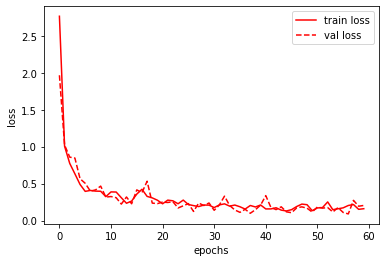

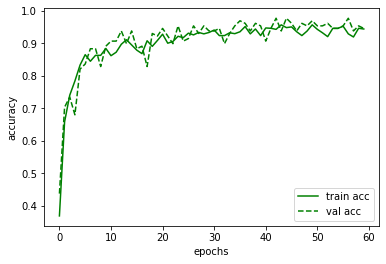

In [20]:
import matplotlib.pyplot as plt
plt.plot(inc_training.history['loss'], label='train loss',color='r')
plt.plot(inc_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# plt.savefig('AccVal_acc')

In [21]:
training_accuracy_inc      = inc_training.history['accuracy'][-1]
training_loss_inc          = inc_training.history['loss'][-1]
validation_accuracy_inc    = inc_training.history['val_accuracy'][-1]
validation_loss_inc        = inc_training.history['val_loss'][-1]
print("Training Accuracy Inception   :", training_accuracy_inc )
print("Training Loss Inception       :", training_loss_inc)
print("Validation Accuracy Inception :", validation_accuracy_inc)
print("Validation Loss Inception     :", validation_loss_inc)

Training Accuracy Inception   : 0.943496823310852
Training Loss Inception       : 0.15992452204227448
Validation Accuracy Inception : 0.9453125
Validation Loss Inception     : 0.20411960780620575


# Generating Confusion Matrix and Classification Report for Inception

In [22]:
# Generating Confusion Matrix and Classification Report
Y_pred_inc = inc_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_inc = np.argmax(Y_pred_inc, axis=1)
print('Confusion Matrix')
conf_matrix_inc = confusion_matrix(validation_generator.classes, y_pred_inc)
cm_inc = np.array2string(conf_matrix_inc)
print(conf_matrix_inc)
print("**=============================================================================================**")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_inc = classification_report(validation_generator.classes, y_pred_inc, target_names=target_names)
print(class_rep_inc)

Confusion Matrix
[[16  0  0  0  0  3  0  1  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0]
 [ 0  0  0 19  0  1  0  0  0]
 [ 0  0  0  0 28  0  1  0  1]
 [ 0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 10]]
**=============================================================================================**
Classification Report
              precision    recall  f1-score   support

       Catla       1.00      0.80      0.89        20
 Comman_Carp       1.00      1.00      1.00        10
  Grass_Carp       1.00      1.00      1.00         7
      Mrigal       1.00      0.95      0.97        20
     Pomfret       1.00      0.93      0.97        30
        Rohu       0.83      1.00      0.91        20
 Silver_carp       0.91      1.00      0.95        10
     Tilapia       0.95      1.00      0.98        20
        Tuna       0.91      1.00      0.95        10

    accuracy                           0.95       

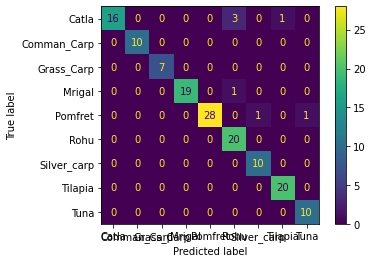

In [23]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_inc,display_labels=target_names)
disp.plot()
plt.show()

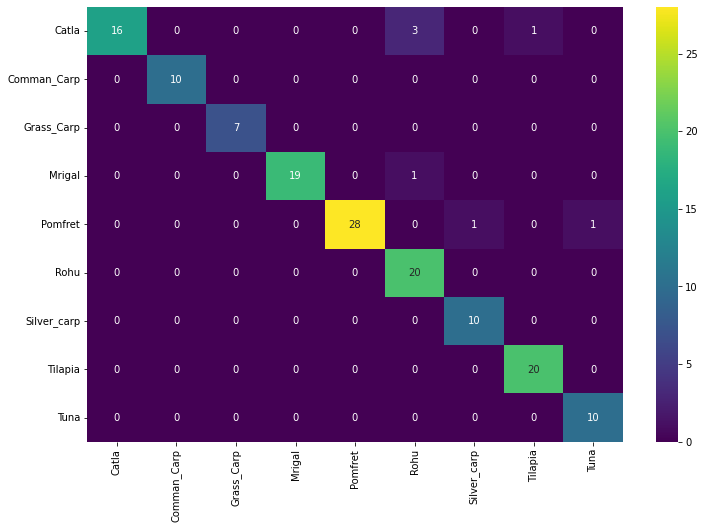

In [24]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix_inc, annot=True, cmap='viridis',xticklabels=target_names,yticklabels=target_names)
plt.show()

# VGG16

In [25]:
epoch_vgg = 60
# learning_rate_vgg = 0.001
batch_size_vgg = 32
steps_per_epoch_vgg = num_of_train_samples // batch_size_vgg
print("Steps per epoch: ",steps_per_epoch_vgg)

Steps per epoch:  30


In [26]:
from keras.applications import vgg16
    # The sequential API allows you to create models layer-by-layer
vgg_model=Sequential()
vgg_model.add(vgg16.VGG16(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg_model.add(Dense(9, activation="softmax"))

    # Summary: to find the number of parameters
vgg_model.layers[0].trainable=False
vgg_model.summary() 

# adam = optimizers.Adam(lr=learning_rate_vgg, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_4 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14,719,305
Trainable params: 4,617
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
# Trains the model for a given number of epochs (iterations on a dataset).
vgg_training = vgg_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg,
                                       epochs = epoch_vgg,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_vgg)

Epoch 1/60
30/30 [==============================] - 325s 11s/step - loss: 1.8225 - accuracy: 0.3977 - val_loss: 1.2979 - val_accuracy: 0.6016
Epoch 2/60
30/30 [==============================] - 313s 10s/step - loss: 0.9725 - accuracy: 0.7015 - val_loss: 0.9350 - val_accuracy: 0.6562
Epoch 3/60
30/30 [==============================] - 316s 10s/step - loss: 0.8018 - accuracy: 0.7548 - val_loss: 0.8162 - val_accuracy: 0.7500
Epoch 4/60
30/30 [==============================] - 314s 10s/step - loss: 0.7142 - accuracy: 0.7783 - val_loss: 0.6705 - val_accuracy: 0.7812
Epoch 5/60
30/30 [==============================] - 314s 10s/step - loss: 0.5893 - accuracy: 0.8475 - val_loss: 0.6277 - val_accuracy: 0.8125
Epoch 6/60
30/30 [==============================] - 315s 11s/step - loss: 0.5259 - accuracy: 0.8710 - val_loss: 0.5612 - val_accuracy: 0.8281
Epoch 7/60
30/30 [==============================] - 319s 11s/step - loss: 0.5050 - accuracy: 0.8625 - val_loss: 0.5167 - val_accuracy: 0.8672
Epoch 

30/30 [==============================] - 317s 11s/step - loss: 0.1842 - accuracy: 0.9574 - val_loss: 0.2432 - val_accuracy: 0.9297
Epoch 59/60
30/30 [==============================] - 316s 10s/step - loss: 0.1990 - accuracy: 0.9467 - val_loss: 0.3286 - val_accuracy: 0.8672
Epoch 60/60
30/30 [==============================] - 314s 10s/step - loss: 0.2027 - accuracy: 0.9467 - val_loss: 0.2485 - val_accuracy: 0.9297


In [54]:
vgg_training.history

{'loss': [1.8224772214889526,
  0.9724608659744263,
  0.8017970323562622,
  0.7142356038093567,
  0.589326798915863,
  0.5259371995925903,
  0.505048394203186,
  0.4811587929725647,
  0.4453115165233612,
  0.4469413757324219,
  0.45057618618011475,
  0.4043826162815094,
  0.4171099364757538,
  0.38502344489097595,
  0.3887133300304413,
  0.36553332209587097,
  0.35374075174331665,
  0.3324216902256012,
  0.32973188161849976,
  0.32988500595092773,
  0.3214011788368225,
  0.314531147480011,
  0.3263096511363983,
  0.3060164153575897,
  0.3231062889099121,
  0.27119943499565125,
  0.2651441991329193,
  0.28332021832466125,
  0.2802830636501312,
  0.2726968228816986,
  0.2604618966579437,
  0.24966780841350555,
  0.2663566768169403,
  0.24934343993663788,
  0.2494402825832367,
  0.27869290113449097,
  0.2520519196987152,
  0.2507310211658478,
  0.23062649369239807,
  0.24187111854553223,
  0.22428733110427856,
  0.22621992230415344,
  0.23247091472148895,
  0.2201596200466156,
  0.2314573

# Model history for VGG

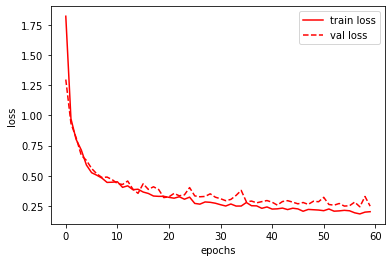

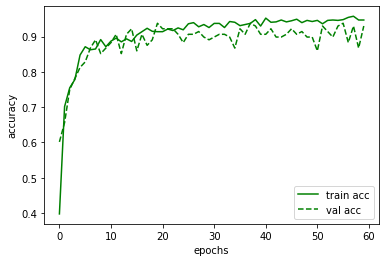

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
plt.plot(vgg_training.history['loss'], label='train loss',color='r')
plt.plot(vgg_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [29]:
training_accuracy_vgg      = vgg_training.history['accuracy'][-1]
training_loss_vgg          = vgg_training.history['loss'][-1]
validation_accuracy_vgg    = vgg_training.history['val_accuracy'][-1]
validation_loss_vgg        = vgg_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg )
print("Training Loss VGG        :", training_loss_vgg)
print("Validation Accuracy VGG  :", validation_accuracy_vgg)
print("Validation Loss VGG      :", validation_loss_vgg)

Training Accuracy VGG    : 0.94669508934021
Training Loss VGG        : 0.20266024768352509
Validation Accuracy VGG  : 0.9296875
Validation Loss VGG      : 0.2485453486442566


# Confusion Matrix and Classification Report for VGG


In [30]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg = vgg_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)
print('Confusion Matrix')
conf_matrix_vgg = confusion_matrix(validation_generator.classes, y_pred_vgg)
cm_vgg = np.array2string(conf_matrix_vgg)
print(conf_matrix_vgg)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_vgg = classification_report(validation_generator.classes, y_pred_vgg, target_names=target_names)
print(class_rep_vgg)

Confusion Matrix
[[18  0  0  0  0  1  0  1  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0]
 [ 0  0  0 13  0  5  0  1  1]
 [ 0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 10]]
Classification Report
              precision    recall  f1-score   support

       Catla       1.00      0.90      0.95        20
 Comman_Carp       1.00      1.00      1.00        10
  Grass_Carp       1.00      1.00      1.00         7
      Mrigal       1.00      0.65      0.79        20
     Pomfret       1.00      1.00      1.00        30
        Rohu       0.77      1.00      0.87        20
 Silver_carp       1.00      1.00      1.00        10
     Tilapia       0.91      1.00      0.95        20
        Tuna       0.91      1.00      0.95        10

    accuracy                           0.94       147
   macro avg       0.95      0.95      0.95       147
weighted avg       0.95      0.94      0

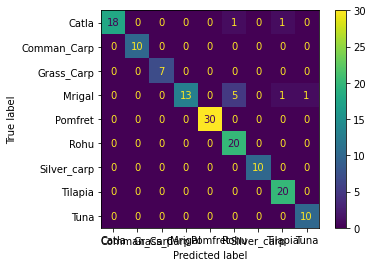

In [31]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg,display_labels=target_names)
disp.plot()
plt.show()

# VGG 19

In [32]:
epoch_vgg19 = 60
# learning_rate_vgg = 0.001
batch_size_vgg19 = 32
steps_per_epoch_vgg19 = num_of_train_samples // batch_size_vgg19
print("Steps per epoch: ",steps_per_epoch_vgg19)

Steps per epoch:  30


In [33]:
from keras.applications import vgg19
    # The sequential API allows you to create models layer-by-layer
vgg19_model=Sequential()
vgg19_model.add(vgg19.VGG19(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg19_model.add(Dense(9, activation="softmax"))

    # Summary: to find the number of parameters
vgg19_model.layers[0].trainable=False
vgg19_model.summary() 

# adam = optimizers.Adam(lr=learning_rate_vgg, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg19_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense_5 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 20,029,001
Trainable params: 4,617
Non-trainable params: 20,024,384
_________________________________________________________________


In [34]:
vgg19_training = vgg19_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg19,
                                       epochs = epoch_vgg19,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_vgg19)

Epoch 1/60
30/30 [==============================] - 340s 11s/step - loss: 1.9932 - accuracy: 0.3390 - val_loss: 1.4154 - val_accuracy: 0.4922
Epoch 2/60
30/30 [==============================] - 329s 11s/step - loss: 1.1662 - accuracy: 0.6269 - val_loss: 1.0673 - val_accuracy: 0.5703
Epoch 3/60
30/30 [==============================] - 329s 11s/step - loss: 0.9062 - accuracy: 0.7239 - val_loss: 0.8987 - val_accuracy: 0.6875
Epoch 4/60
30/30 [==============================] - 308s 10s/step - loss: 0.7806 - accuracy: 0.7740 - val_loss: 0.7266 - val_accuracy: 0.7891
Epoch 5/60
30/30 [==============================] - 269s 9s/step - loss: 0.7271 - accuracy: 0.7783 - val_loss: 0.6964 - val_accuracy: 0.7656
Epoch 6/60
30/30 [==============================] - 271s 9s/step - loss: 0.6580 - accuracy: 0.8262 - val_loss: 0.6462 - val_accuracy: 0.7812
Epoch 7/60
30/30 [==============================] - 271s 9s/step - loss: 0.6135 - accuracy: 0.8337 - val_loss: 0.6066 - val_accuracy: 0.7891
Epoch 8/6

30/30 [==============================] - 332s 11s/step - loss: 0.2459 - accuracy: 0.9328 - val_loss: 0.2616 - val_accuracy: 0.9141
Epoch 59/60
30/30 [==============================] - 329s 11s/step - loss: 0.2752 - accuracy: 0.9158 - val_loss: 0.2263 - val_accuracy: 0.9609
Epoch 60/60
30/30 [==============================] - 329s 11s/step - loss: 0.2683 - accuracy: 0.9158 - val_loss: 0.2125 - val_accuracy: 0.9453


In [ ]:
vgg19_training.history

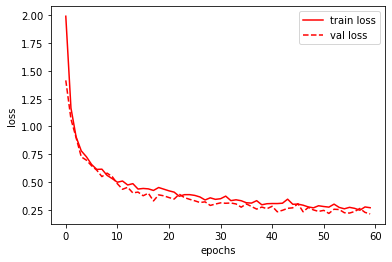

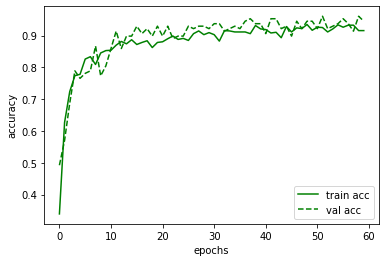

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
plt.plot(vgg19_training.history['loss'], label='train loss',color='r')
plt.plot(vgg19_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg19_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg19_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [36]:
training_accuracy_vgg19      = vgg19_training.history['accuracy'][-1]
training_loss_vgg19          = vgg19_training.history['loss'][-1]
validation_accuracy_vgg19    = vgg19_training.history['val_accuracy'][-1]
validation_loss_vgg19        = vgg19_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg19 )
print("Training Loss VGG        :", training_loss_vgg19)
print("Validation Accuracy VGG  :", validation_accuracy_vgg19)
print("Validation Loss VGG      :", validation_loss_vgg19)

Training Accuracy VGG    : 0.9157782793045044
Training Loss VGG        : 0.2683229446411133
Validation Accuracy VGG  : 0.9453125
Validation Loss VGG      : 0.21249833703041077


In [37]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg19 = vgg19_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg19 = np.argmax(Y_pred_vgg19, axis=1)
print('Confusion Matrix')
conf_matrix_vgg19 = confusion_matrix(validation_generator.classes, y_pred_vgg19)
cm_vgg19 = np.array2string(conf_matrix_vgg19)
print(conf_matrix_vgg19)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_vgg19 = classification_report(validation_generator.classes, y_pred_vgg19, target_names=target_names)
print(class_rep_vgg19)

Confusion Matrix
[[19  0  0  0  0  1  0  0  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0]
 [ 0  0  0 15  0  3  0  1  1]
 [ 0  0  0  0 30  0  0  0  0]
 [ 1  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  2  0 18  0]
 [ 0  0  0  0  0  0  0  0 10]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.95      0.95      0.95        20
 Comman_Carp       1.00      1.00      1.00        10
  Grass_Carp       1.00      1.00      1.00         7
      Mrigal       1.00      0.75      0.86        20
     Pomfret       1.00      1.00      1.00        30
        Rohu       0.76      0.95      0.84        20
 Silver_carp       1.00      1.00      1.00        10
     Tilapia       0.95      0.90      0.92        20
        Tuna       0.91      1.00      0.95        10

    accuracy                           0.94       147
   macro avg       0.95      0.95      0.95       147
weighted avg       0.95      0.94      0

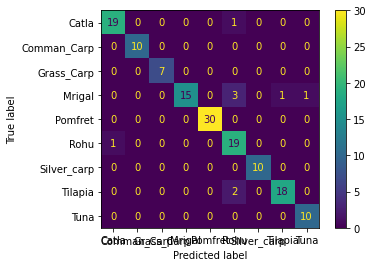

In [38]:
# import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg19,display_labels=target_names)
disp.plot()
plt.show()

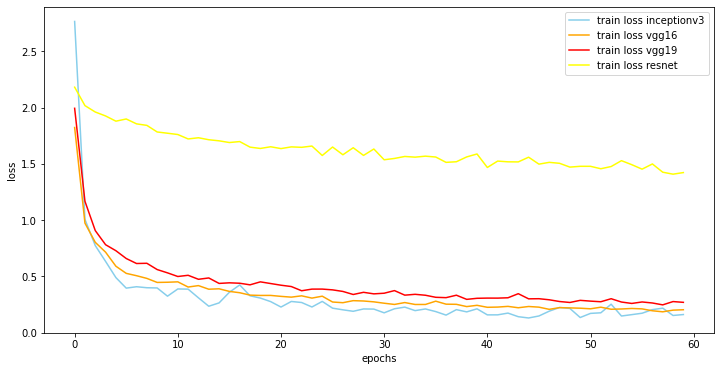

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
# plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
# plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
# plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
# plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
# plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

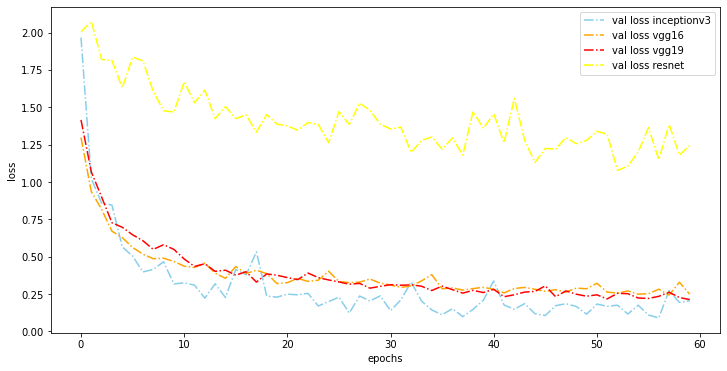

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='-.',color='skyblue')

# plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='-.',color='orange')

# plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='-.',color='red')

# plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='-.',color='yellow')

# plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
# plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

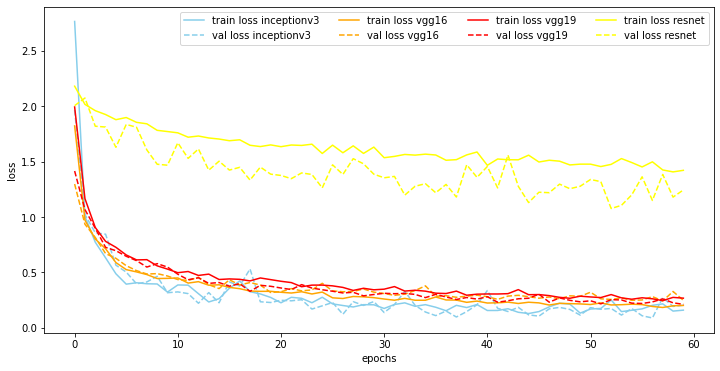

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
# plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

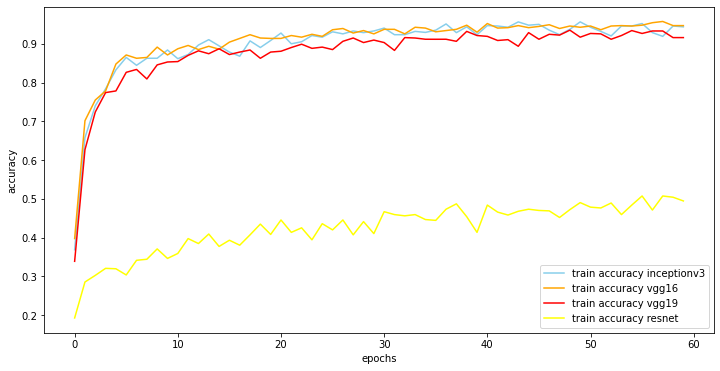

In [48]:
plt.figure(figsize=(12,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
# plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
# plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
# plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
# plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
# plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()

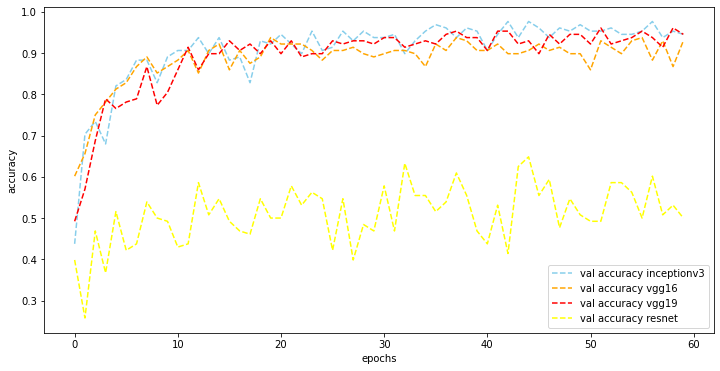

In [49]:
plt.figure(figsize=(12,6))
# plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

# plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

# plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
# plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()

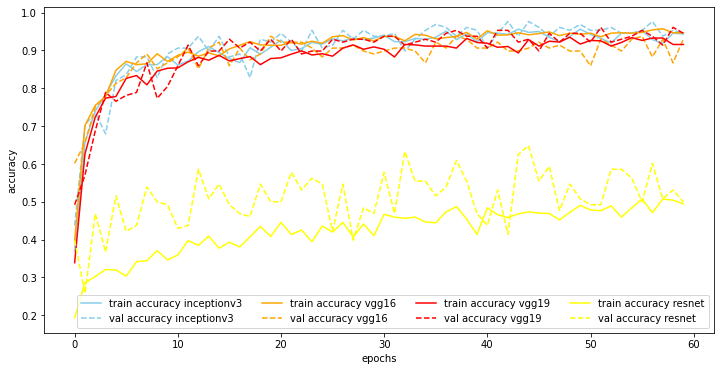

In [51]:
plt.figure(figsize=(12,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
# plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()

# Custom Network

In [74]:
epoch_cn = 60
learning_rate_cn = 0.001
batch_size_cn = 64
steps_per_epoch_cn = num_of_train_samples // batch_size_cn
print("Steps per epoch: ",steps_per_epoch_cn)

Steps per epoch:  15


In [75]:
# Custom network
model_cn = Sequential()
model_cn.add(Conv2D(16,(3,3),input_shape=(256,256,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization)
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))
model_cn.add(Dropout(0.25))


model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(64,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Flatten())
model_cn.add(Dense(256,activation='relu'))
#model.add(LeakyReLU(0.1))
model_cn.add(Dropout(0.5))
model_cn.add(Dense(9))
model_cn.add(Activation("softmax"))

model_cn.summary()


model_cn.compile(loss="categorical_crossentropy",
                  optimizer= 'adam',
                  metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 activation_94 (Activation)  (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 activation_95 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [76]:
# Trains the model for a given number of epochs (iterations on a dataset).
cn_training = model_cn.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_cn,
                                       epochs = epoch_cn,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_cn)

Epoch 1/30
15/15 [==============================] - 78s 5s/step - loss: 2.4628 - accuracy: 0.1458 - val_loss: 2.0391 - val_accuracy: 0.6250
Epoch 2/30
15/15 [==============================] - 68s 5s/step - loss: 2.0386 - accuracy: 0.1795 - val_loss: 2.1995 - val_accuracy: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 69s 5s/step - loss: 2.0791 - accuracy: 0.2009 - val_loss: 2.1668 - val_accuracy: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 72s 5s/step - loss: 2.0983 - accuracy: 0.1875 - val_loss: 2.1371 - val_accuracy: 0.5312
Epoch 5/30
15/15 [==============================] - 70s 5s/step - loss: 2.0547 - accuracy: 0.2083 - val_loss: 2.2040 - val_accuracy: 0.0625
Epoch 6/30
15/15 [==============================] - 70s 5s/step - loss: 2.0610 - accuracy: 0.1708 - val_loss: 1.9631 - val_accuracy: 0.6250
Epoch 7/30
15/15 [==============================] - 69s 5s/step - loss: 1.9623 - accuracy: 0.2333 - val_loss: 1.7480 - val_accuracy: 0.6250
Epoch 8/30
1

# Saving the model history for Custom network

In [77]:
training_accuracy_cn      = cn_training.history['accuracy'][-1]
training_loss_cn          = cn_training.history['loss'][-1]
validation_accuracy_cn    = cn_training.history['val_accuracy'][-1]
validation_loss_cn        = cn_training.history['val_loss'][-1]
print("Training Accuracy CN    :", training_accuracy_cn )
print("Training Loss CN        :", training_loss_cn)
print("Validation Accuracy CN  :", validation_accuracy_cn)
print("Validation Loss CN      :", validation_loss_cn)

Training Accuracy CN    : 0.44999998807907104
Training Loss CN        : 1.444693684577942
Validation Accuracy CN  : 0.625
Validation Loss CN      : 1.9299068450927734


# Generating Confusion Matrix and Classification Report for Custom Network

In [78]:
# Generating Confusion Matrix and Classification Report
Y_pred_cn = model_cn.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_cn = np.argmax(Y_pred_cn, axis=1)
print('Confusion Matrix')
conf_matrix_cn = confusion_matrix(validation_generator.classes, y_pred_cn)
cm_cn = np.array2string(conf_matrix_cn)
print(conf_matrix_cn)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_cn = classification_report(validation_generator.classes, y_pred_cn, target_names=target_names)
print(class_rep_cn)

Confusion Matrix
[[20  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  5  1  0  0]
 [ 6  0  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  1  0 16  0]
 [ 1  0  0  2 12  2  0  8  5]
 [ 5  0  0  0  0  0  0 15  0]
 [ 2  0  0  0  0  2  6  0  0]
 [ 2  0  0  0  0  6  0 12  0]
 [ 0  0  0  0  0 10  0  0  0]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.50      1.00      0.67        20
 Comman_Carp       0.00      0.00      0.00        10
  Grass_Carp       0.00      0.00      0.00         7
      Mrigal       0.60      0.15      0.24        20
     Pomfret       1.00      0.40      0.57        30
        Rohu       0.00      0.00      0.00        20
 Silver_carp       0.86      0.60      0.71        10
     Tilapia       0.24      0.60      0.34        20
        Tuna       0.00      0.00      0.00        10

    accuracy                           0.36       147
   macro avg       0.35      0.31      0.28       147
weighted avg       0.44      0.36      0

# Comparing Accuracies and losses for all the models

In [79]:

model_comp = pd.DataFrame({"Models": ['VGG19', 'Inception', 'VGG16', 'Custom Network'],
                           "Batch Size":[32,32,32,64],
                           "Epochs":[30,30,30,30],
                           "Learning Rate": [0.001,0.001,0.001,0.001],
                           "Steps per epoch":[30,30,30,15],
                           "Image Resolution":['256*256','256*256', '256*256', '256*256'],
                          "Training Accuracy": [training_accuracy_vgg19,training_accuracy_inc,training_accuracy_vgg,training_accuracy_cn],
                          "Training Loss": [training_loss_vgg19,training_loss_inc,training_loss_vgg,training_loss_cn],
                          "Validation Accuracy": [validation_accuracy_vgg19,validation_accuracy_inc,validation_accuracy_vgg,validation_accuracy_cn],
                          "Validation Loss": [validation_loss_vgg19,validation_loss_inc,validation_loss_vgg,validation_loss_cn],
                          })
model_comp

,Models,Batch Size,Epochs,Learning Rate,Steps per epoch,Image Resolution,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss
0,VGG19,32,30,0.001,30,256*256,0.670886,1.134070,0.421875,1.415348
1,Inception,32,30,0.001,30,256*256,0.806250,0.533776,0.718750,1.008033
2,VGG16,32,30,0.001,30,256*256,0.664557,1.189333,0.328125,1.668478
3,Custom Network,64,30,0.001,15,256*256,0.450000,1.444694,0.625000,1.929907


# Combine Result

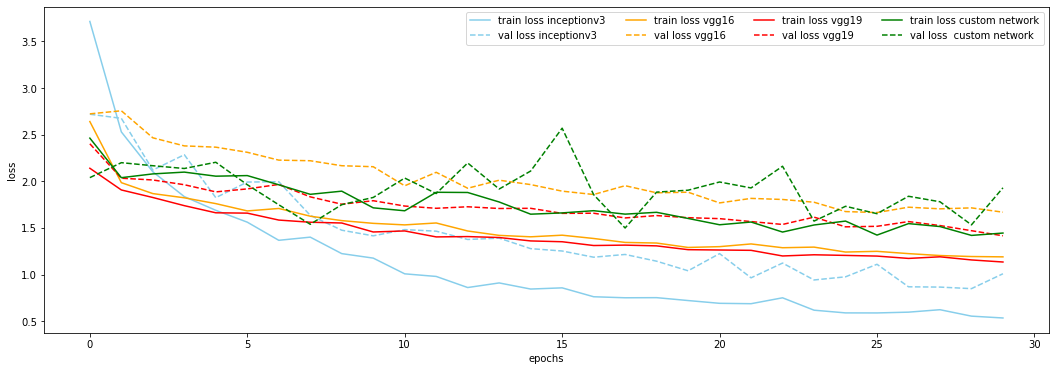

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
# plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')


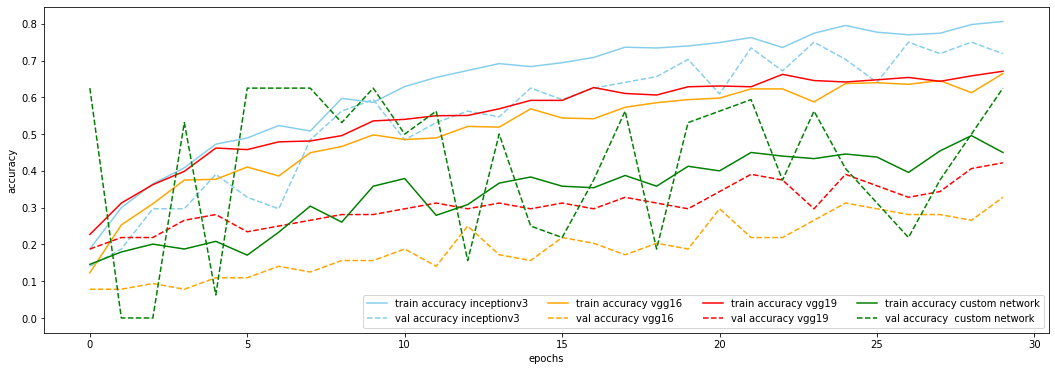

In [84]:

# plot the accuracy
# plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
# plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')

plt.figure(figsize=(18,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
# plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()